In [277]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [278]:
data = pd.read_csv("high_diamond_ranked_10min.csv")
# show first 5 entries of dataset

data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [279]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [280]:
# most of these columns are direct opposites or can be worked out using an already existing columns.
drop_cols= ['gameId', 'blueTotalMinionsKilled', 'redTotalMinionsKilled', 'blueDeaths', 'redDeaths', 'redFirstBlood'
           , 
            'blueGoldDiff', 'redGoldDiff', 'redEliteMonsters', 'blueEliteMonsters',  'blueExperienceDiff', 'redExperienceDiff'
           , 'blueGoldPerMin', 'redGoldPerMin', 'redCSPerMin', 'blueCSPerMin']
clean_data = data.drop(drop_cols, axis = 1)

# number of rows and columns
rows, columns = data.shape
print(rows, columns)

9879 40


C:\Users\Jenai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    4949
1    4930
Name: blueWins, dtype: int64

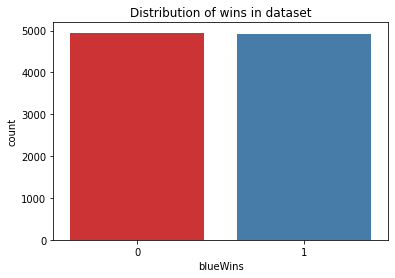

In [281]:
# bar chart to check for bias in the distribution of wins.
plt.title("Distribution of wins in dataset")
sb.countplot(data['blueWins'], palette="Set1")
clean_data['blueWins'].value_counts()

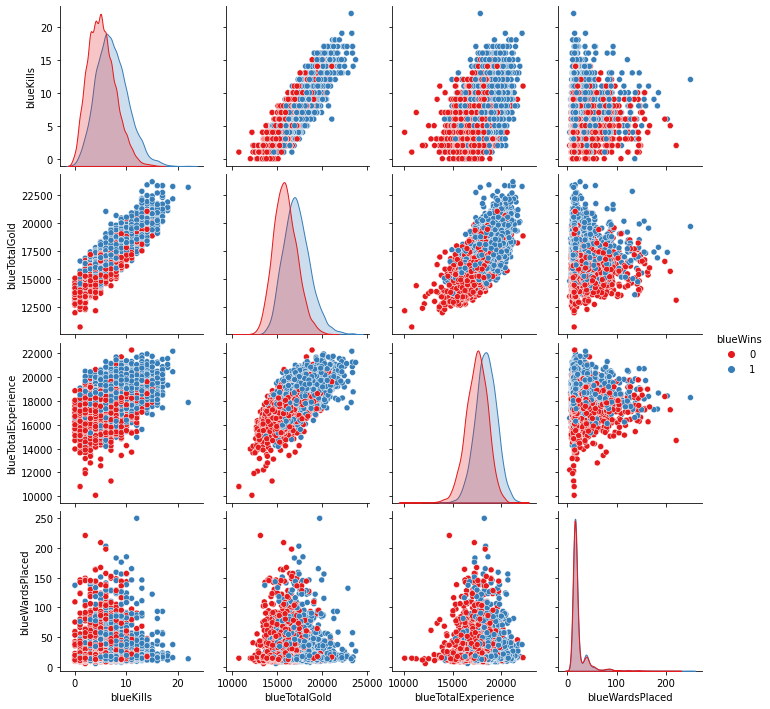

In [282]:
# pairplot to show how blue team stats affect their chances of winning
sb.pairplot(clean_data, hue='blueWins', vars=['blueKills', 'blueTotalGold', 'blueTotalExperience', 'blueWardsPlaced'], palette='Set1')

<AxesSubplot:>

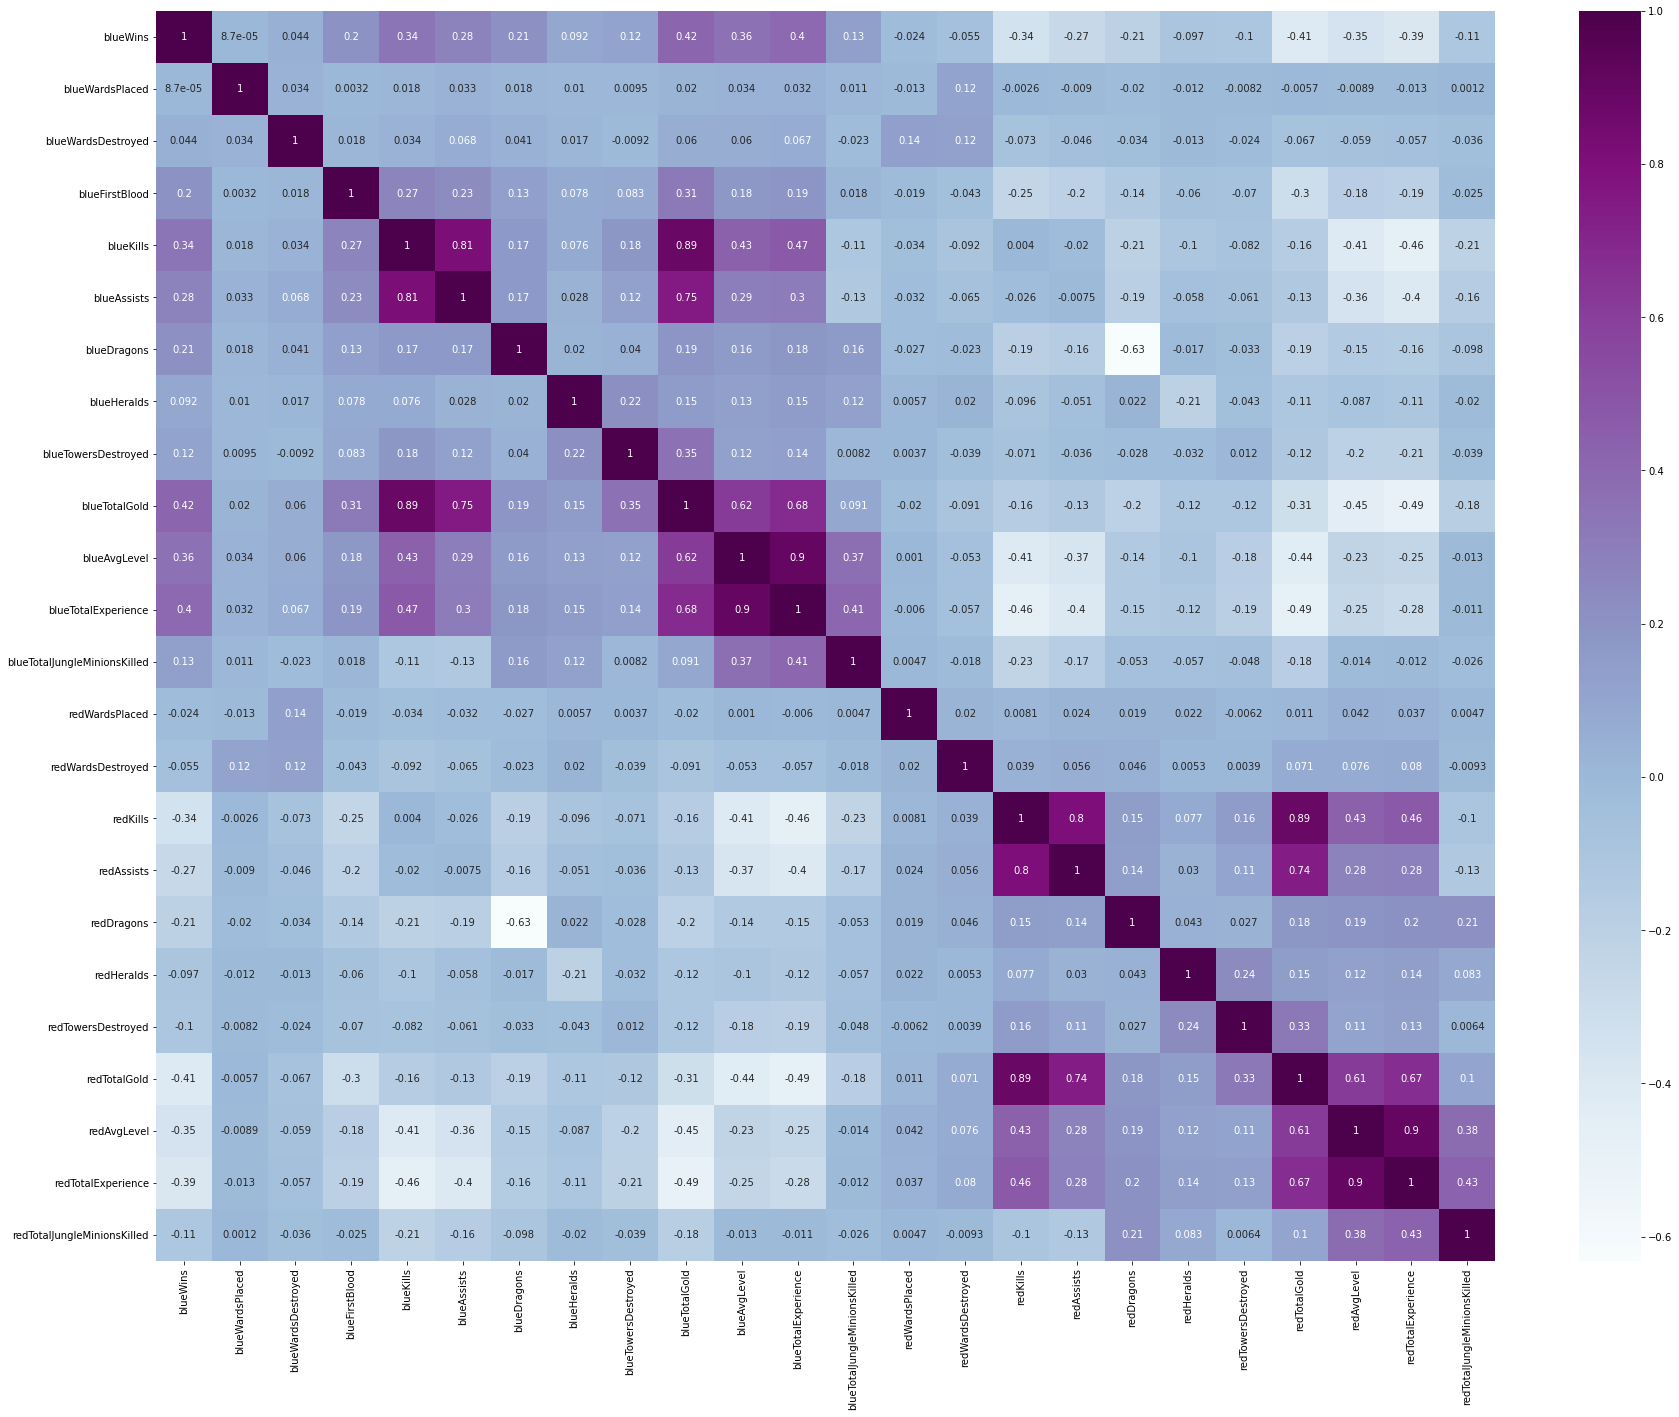

In [283]:
plt.figure(figsize=(30, 23))
sb.heatmap(clean_data.corr(), annot=True, cmap="BuPu")

In [284]:
# dropping variables that have less than 0.2 correlation with blueWins
drop_corr = [ 'blueWardsDestroyed', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalJungleMinionsKilled'
            , 'redHeralds', 'redTowersDestroyed', 'redTotalJungleMinionsKilled', 'blueWardsPlaced', 'redWardsPlaced',  'redWardsDestroyed', 'blueWins']
features = clean_data.drop(drop_corr, axis=1)
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   blueFirstBlood       9879 non-null   int64  
 1   blueKills            9879 non-null   int64  
 2   blueAssists          9879 non-null   int64  
 3   blueDragons          9879 non-null   int64  
 4   blueTotalGold        9879 non-null   int64  
 5   blueAvgLevel         9879 non-null   float64
 6   blueTotalExperience  9879 non-null   int64  
 7   redKills             9879 non-null   int64  
 8   redAssists           9879 non-null   int64  
 9   redDragons           9879 non-null   int64  
 10  redTotalGold         9879 non-null   int64  
 11  redAvgLevel          9879 non-null   float64
 12  redTotalExperience   9879 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 1003.5 KB


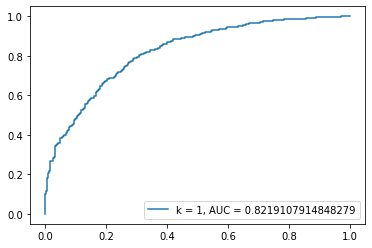

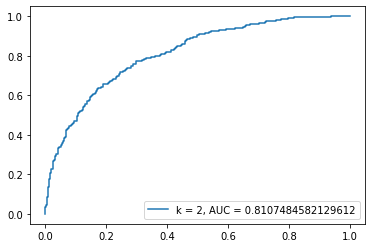

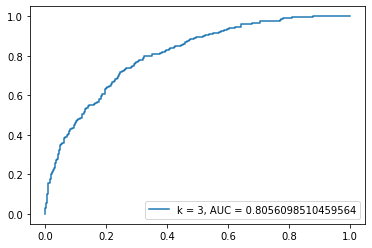

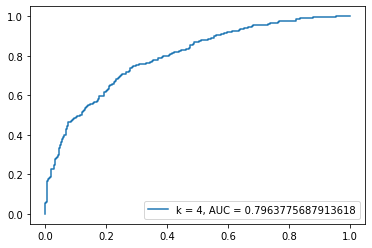

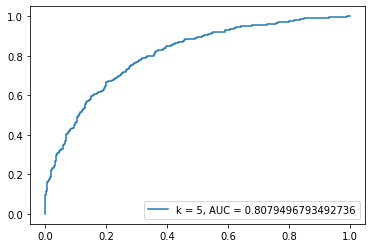

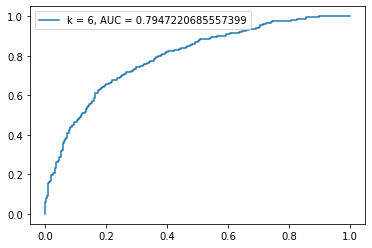

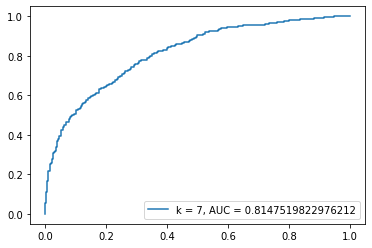

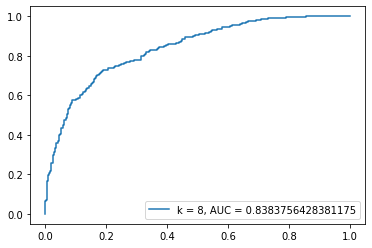

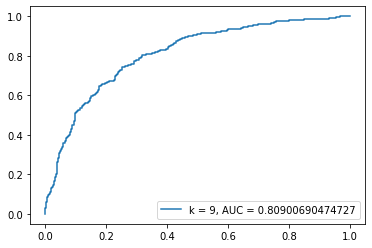

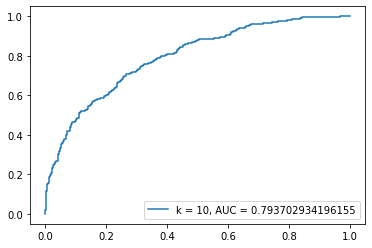

Text(0.5, 1.0, 'Average accuracy: 0.73154982382306')

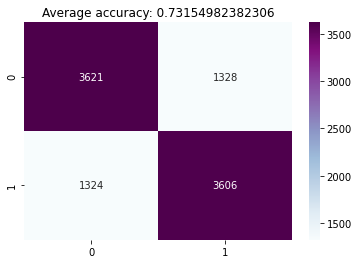

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, RocCurveDisplay
from sklearn import metrics

k = 10 # number of kfolds
confusion_matrix = [[0, 0],[0, 0]]
logistic_acc = 0
target = data['blueWins'] #True results
finalModel = None
doRocCurve = True

def modelClassification(trainedModel, X_test, y_test):
    test = trainedModel.predict(X_test)
    accuracy = accuracy_score(test, y_test)
    confusion = metrics.confusion_matrix(y_test, test)  
    return accuracy, confusion

def trainModel(model, dataFrame, sf):
    acc = 0
    confusion = 0
    k_counter = 1
    for train, test in sf.split(dataFrame, target): #Logistic regression
        X_train, X_test = dataFrame.iloc[train], dataFrame.iloc[test]
        y_train, y_test = target[train], target[test]
        finalModel = trainedModel = model.fit(X_train, y_train)
        answers = modelClassification(trainedModel, X_test, y_test)
        acc += answers[0]
        confusion += answers[1]
        if doRocCurve:
            rocCurve(X_test, y_test, finalModel, k_counter)
        k_counter += 1
    return acc, confusion, finalModel

def rocCurve(X_test, y_test, model, k):
    y_pred = model.predict_proba(X_test)[::,1]
    x, y, _ = metrics.roc_curve(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    plt.plot(x, y, label= f'k = {k}, AUC = {auc}')
    plt.legend()
    plt.show()

skfold = StratifiedKFold(n_splits=k)
skfold.get_n_splits(features, target)
logistic_acc, confusion_matrix, finalModel = trainModel(LogisticRegression(solver='liblinear'), features, skfold)

# confusion matrix for logistic regression
sb.heatmap(confusion_matrix, annot=True, cmap="BuPu", fmt='g')
title = "Average accuracy: " + str(logistic_acc/k)
plt.title(title)



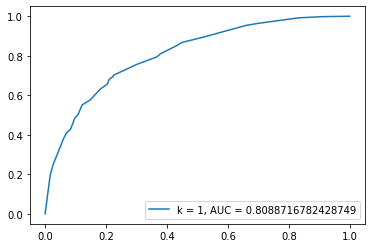

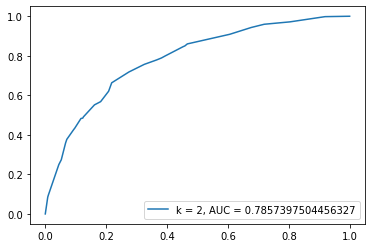

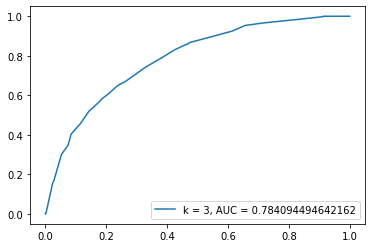

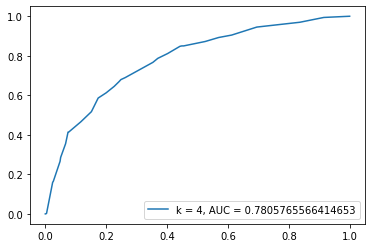

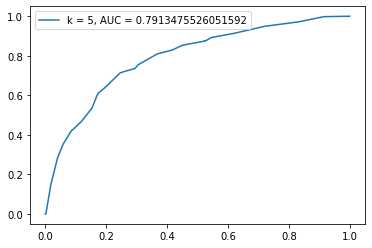

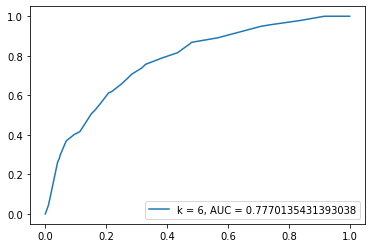

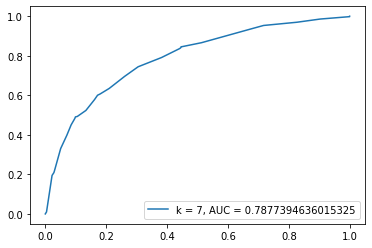

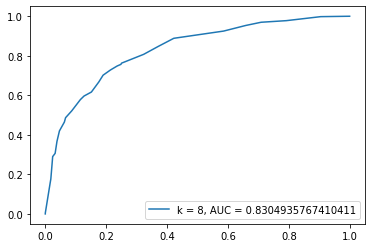

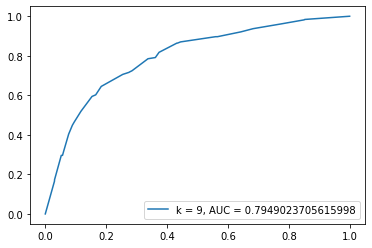

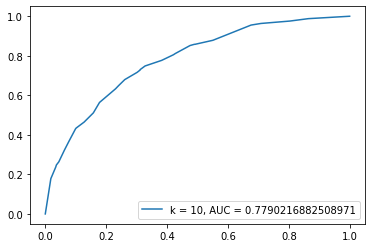

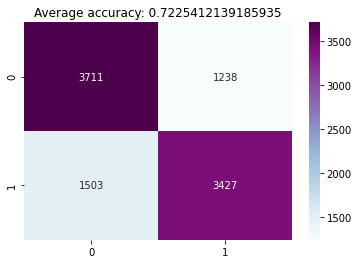

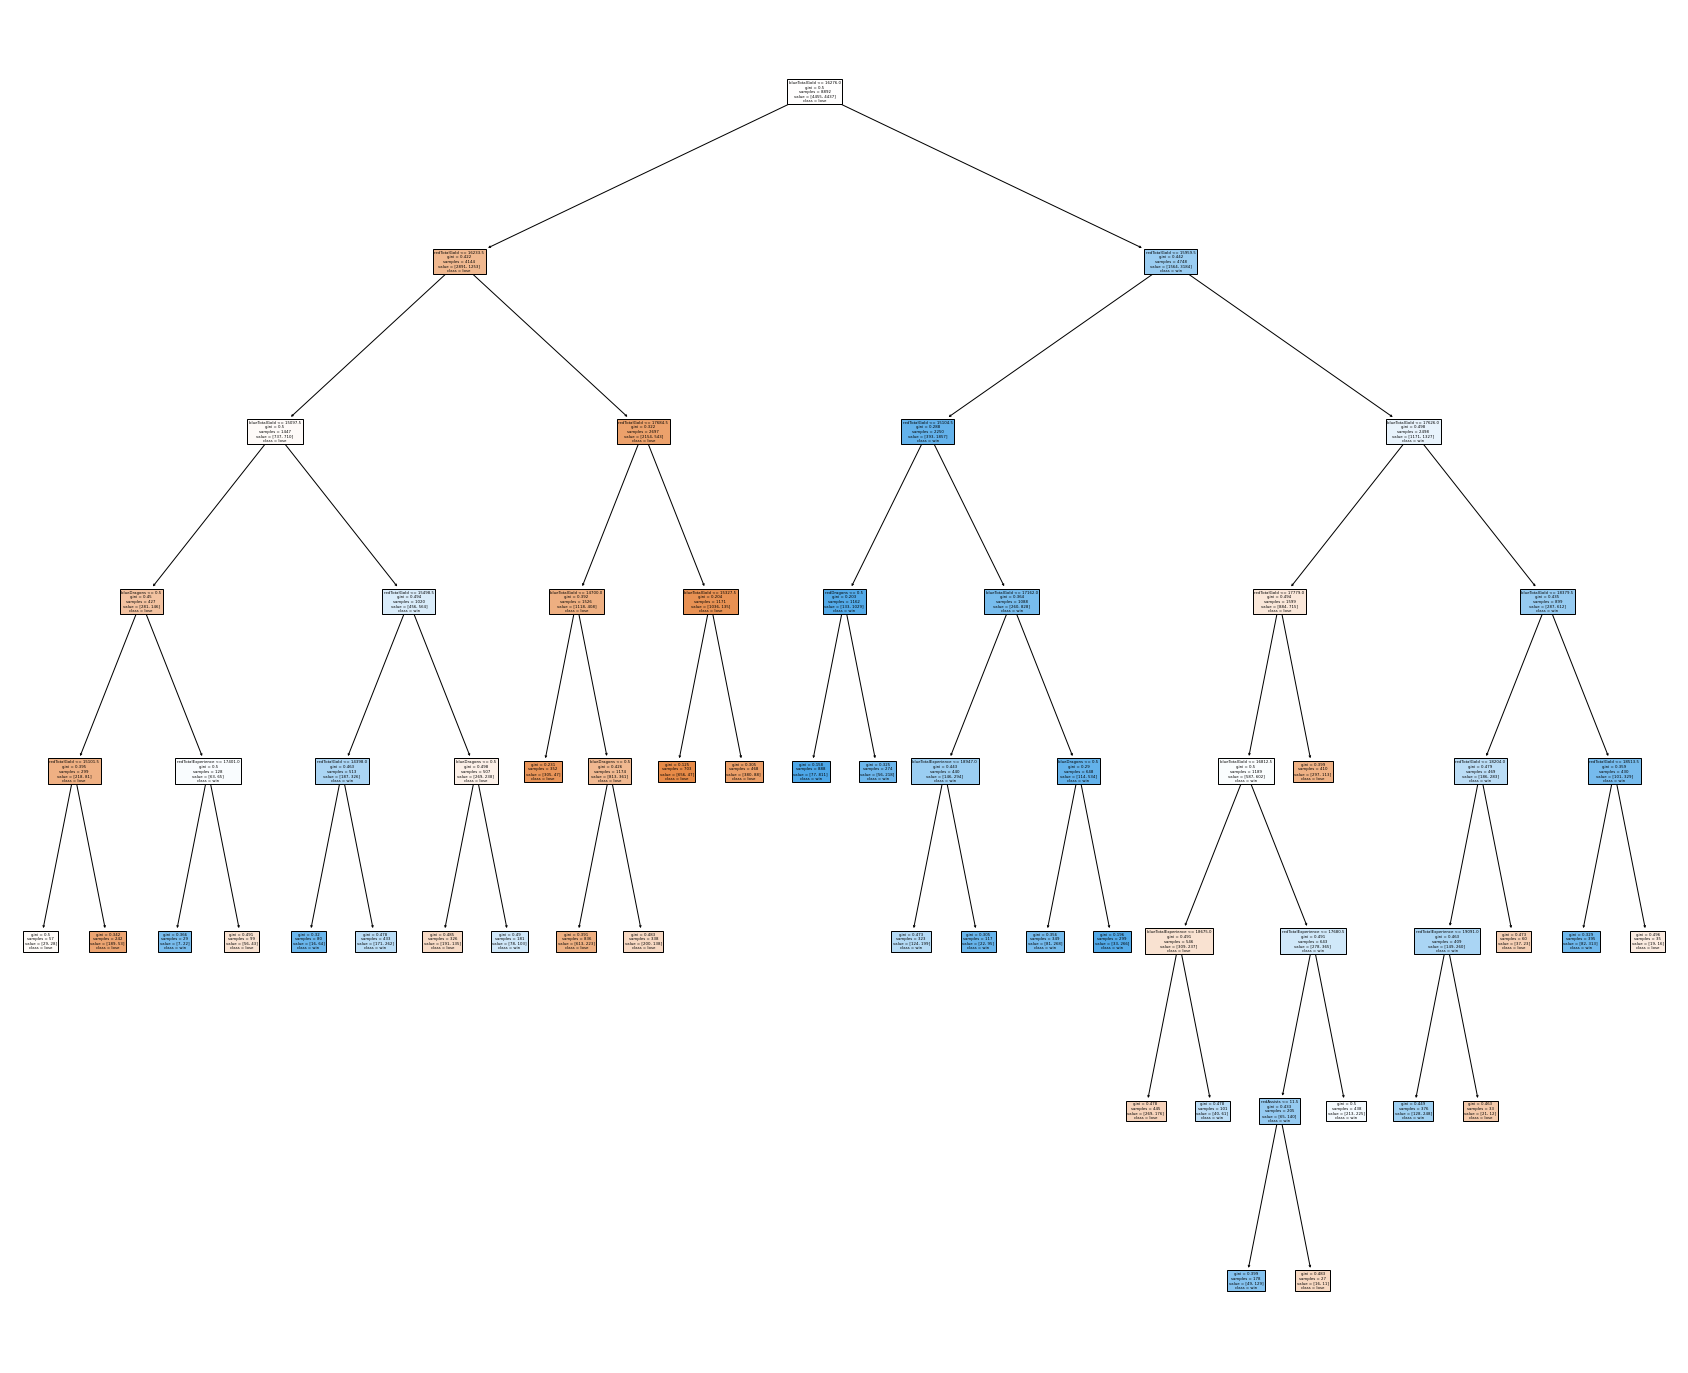

In [286]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
confusion_matrix = [[0, 0],[0, 0]]
tree_acc = 0

tree_acc, confusion_matrix, finalModel = trainModel(DecisionTreeClassifier(max_depth = 7, max_leaf_nodes = 30), features, skfold)

# confusion matrix for Decision Tree
sb.heatmap(confusion_matrix, annot=True, cmap="BuPu", fmt='g')
title = "Average accuracy: " + str(tree_acc/k)
plt.title(title)
plt.figure(figsize=(30, 25))
_ = tree.plot_tree(finalModel, feature_names = features.columns, class_names = ['lose', 'win'], filled=True)

In [287]:
from sklearn.tree import DecisionTreeClassifier

confusion_matrix = [[0, 0],[0, 0]]
tree_acc = 0
doRocCurve = False

for i in range(2, 52, 2):
    tree_acc, confusion_matrix, finalModel = trainModel(DecisionTreeClassifier(max_leaf_nodes=i), features, skfold)
    print(f'Maximum leaf nodes: {i} Accuracy: {tree_acc/k}')
    tree_acc = 0
    
for i in range (1, 35):
    tree_acc, confusion_matrix, finalModel = trainModel(DecisionTreeClassifier(max_depth=i, max_leaf_nodes=30), features, skfold)
    print(f'Maximum depth: {i} Accuracy: {tree_acc/k}')
    tree_acc = 0

Maximum leaf nodes: 2 Accuracy: 0.680330121539528
Maximum leaf nodes: 4 Accuracy: 0.6819495547379085
Maximum leaf nodes: 6 Accuracy: 0.6999676974760962
Maximum leaf nodes: 8 Accuracy: 0.7030045449138396
Maximum leaf nodes: 10 Accuracy: 0.7034094032134346
Maximum leaf nodes: 12 Accuracy: 0.7084709523399335
Maximum leaf nodes: 14 Accuracy: 0.712317208733782
Maximum leaf nodes: 16 Accuracy: 0.7147465636267427
Maximum leaf nodes: 18 Accuracy: 0.7177830008737063
Maximum leaf nodes: 20 Accuracy: 0.7184917079933877
Maximum leaf nodes: 22 Accuracy: 0.7204151951072444
Maximum leaf nodes: 24 Accuracy: 0.7209212679817383
Maximum leaf nodes: 26 Accuracy: 0.7223388873164909
Maximum leaf nodes: 28 Accuracy: 0.7219340290168957
Maximum leaf nodes: 30 Accuracy: 0.7224399993436947
Maximum leaf nodes: 32 Accuracy: 0.7209216781725181
Maximum leaf nodes: 34 Accuracy: 0.7200104393553441
Maximum leaf nodes: 36 Accuracy: 0.7213262288290284
Maximum leaf nodes: 38 Accuracy: 0.7209213705294333
Maximum leaf nodes